# SI 330 - Homework #3: Text Processing

In ways that we still have yet to fully comprehend, the 2016 presidential election changed the fate of US history. Underdog Donald J Trump shocked the world, upsetting frontrunner Hilary Clinton. Clinton and many others have gone on record saying they believe the  "email controversy", which became a major point of contention just days before the election, contributed mightily to her defeat. 

On March 16, 2016 WikiLeaks launched a searchable archive for over 30 thousand emails & email attachments sent to and from Hillary Clinton's private email server while she was Secretary of State. The 50,547 pages of documents span from 30 June 2010 to 12 August 2014. 7,570 of the documents were sent by Hillary Clinton. The emails were made available in the form of thousands of PDFs by the US State Department as a result of a Freedom of Information Act request. More PDFs were made available on February 29, 2016, and a set of additional 995 emails was imported up to February 2, 2018.

In July 2016, FBI Director James Comey stated that the bureau did not recommend charges against Hilary after thoroughly investigating her emails, but then out of the blue 11 days before the election, Comey reopened the investigation based on new emails. This sent the media into a frenzy. Part of the controversy was surrounding whether or not classified emails sent on the private server were a national security breach. The FBI eventually deemed Clinton's new emails harmless just 2 days before the election.

The original dataset is available via https://wikileaks.org/clinton-emails/ and a more usable format of it is available via https://github.com/Mithileysh/Email-Datasets/tree/master/Hillary%20Clinton%20Datasets.  The data provided for this assignment are from the latter site.

As in previous homework assignments, 5 points are allocated to conforming to PEP-8 code style guidelines, and 5 points are allocated to spelling, punctuation, grammar, and following the submission guidelines.  The remaining 40 points are distributed as shown below.

We recommend you spend some time familiarizing yourself with the dataset.  In particular, you should strive to understand the relationships between the different CSV files and the location of different pieces of information.

In [245]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

In [205]:
emails = pd.read_csv('Hillary Clinton Datasets/Emails.csv')

In [206]:
emails.sample(10)

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
3413,3414,C05766005,NO ANIFAH CALL AT 7:30.,H,"Abedin, Huma",81.0,2009-12-10T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0051-0056/DO...,F-2014-20439,...,H,"Abedin, Huma <AbedinH©state.gov>",NaN,"Thursday, December 10, 2009 6:42 AM",F-2014-20439,C05766005,08/31/2015,RELEASE IN FULL,NaN,UNCLASSIFIED U.S. Department of State Case No....
7146,7147,C05774119,FROM DAN,H,"Mills, Cheryl D",32.0,2010-11-14T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0108/DOC_0C0...,F-2014-20439,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>",NaN,"Sunday, November 14, 2010 9:34 PM",F-2014-20439,C05774119,08/31/2015,RELEASE IN PART,sigh,B6\nUNCLASSIFIED U.S. Department of State Case...
1140,1141,C05760404,MINI SCHEDULE,JilotyLC@state.gov,H,80.0,2009-12-07T05:00:00+00:00,2015-06-30T04:00:00+00:00,DOCUMENTS/HRCAll_1_1-29_JuneWEB/AddBacks/DOC_0...,F-2014-20439,...,'JilotyLC@state.gov',H <hrod17@clintonemail.com>,NaN,"Monday, December 7, 2009 1:19 PM",F-2014-20439,C05760404,06/30/2015,RELEASE IN FULL,Tell Lona I'm running late but want to resched...,UNCLASSIFIED U.S. Department of State Case No....
2258,2259,C05763032,A NOTE FROM,H,"Mills, Cheryl D",32.0,2009-06-12T04:00:00+00:00,2015-06-30T04:00:00+00:00,DOCUMENTS/HRCAll_1_1-29_JuneWEB/23_24_25_26/DO...,F-2014-20439,...,"Capricia Penavic Marshall; Mills, Cheryl D <Mi...",Minyon Moore .,NaN,Fri Jun 1215:21:19,F-2014-20439,C05763032,06/30/2015,RELEASE IN PART,-\nRELEASE IN PART\nB6,Original Message\nFrom: Minyon Moore .\nTo: Ca...
3187,3188,C05765287,RENDEZ-VOUS IN KABUL...,H,"Sullivan, Jacob J",87.0,2009-11-18T05:00:00+00:00,2015-07-31T04:00:00+00:00,DOCUMENTS/HRCEmail_JulyWeb/Web_048/DOC_0C05765...,F-2014-20439,...,NaN,NaN,NaN,NaN,F-2014-20439,C05765287,07/31/2015,RELEASE IN PART,"Importance:\nFYI\nSullivan, Jacob J <SullivanJ...",UNCLASSIFIED U.S. Department of State Case No....
3322,3323,C05765848,TONITE,H,"Abedin, Huma",81.0,2009-09-12T04:00:00+00:00,2015-07-31T04:00:00+00:00,DOCUMENTS/HRCEmail_JulyWeb/Web_037/DOC_0C05765...,F-2014-20439,...,NaN,"Abedin, Huma <AbedinH@state.gov>",NaN,"Saturday, September 12, 2009 8:53 AM",F-2014-20439,C05765848,07/31/2015,RELEASE IN FULL,We tentatively told the plane 9nm wheels up. D...,UNCLASSIFIED U.S. Department of State Case No....
3431,3432,C05766034,REP. MEEK IS HAITI - DETAILS,H,"Mills, Cheryl D",32.0,2010-01-17T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0058/DOC_0C0...,F-2014-020439,...,NaN,NaN,NaN,NaN,F-2014-20439,C05766034,08/31/2015,RELEASE IN PART,"Mills, Cheryl D <MillsCD@state.gov>\nSunday, J...",UNCLASSIFIED U.S. Department of State Case No....
2721,2722,C05764334,MINI SCHEDULE WEDNESDAY 9/2/09,H,"Jiloty, Lauren C",116.0,2009-09-02T04:00:00+00:00,2015-07-31T04:00:00+00:00,DOCUMENTS/HRCEmail_JulyWeb/Web_036/DOC_0C05764...,F-2014-20439,...,NaN,"Jiloty, Lauren C <JilotyLC@state.gov>",NaN,"Wednesday, September 02, 2009 9:19 AM",F-2014-20439,C05764334,07/31/2015,RELEASE IN FULL,10:00 am DEPART OTR Residence\nEn route LaGuar...,UNCLASSIFIED U.S. Department of State Case No....
6001,6002,C05771314,(REUTERS) GAZA ROCKET FIRE DRAWS ISRAELI AIR S...,H,"Abedin, Huma",81.0,2010-09-04T04:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0096/DOC_0C0...,F-2014-20439,...,NaN,"Abedin, Huma <AbedinH@state.gov>",SES-O_Shift-III,"Saturday, September 4, 2010 7:08 PM",F-2014-20439,C05771314,08/31/2015,RELEASE IN FULL,NaN,UNCLASSIFIED U.S. Department of State Case No....
6805,6806,C05773141,GREAT JOB,millscd@state.gov,H,80.0,2010-01-21T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0117/DOC_0C0...,F-2014-20439,...,'millscd@st

In [207]:
emails.shape

(7945, 22)

In [208]:
emails.ExtractedBodyText.iloc[4]

'H <hrod17@clintonemail.com>\nFriday, March 11, 2011 1:36 PM\nHuma Abedin\nFw: H: Latest: How Syria is aiding Qaddafi and more... Sid\nhrc memo syria aiding libya 030311.docx\nPis print.'

_____________

### Q1: (2 points)
How many email messages did Hillary Clinton send?  How many did she receive?

Hint: start by looking up Hillary Clinton's PersonID in the Persons.csv table.

In [209]:
persons = pd.read_csv('Hillary Clinton Datasets/Persons.csv')

#how many did she send?
hillary_ID = persons[persons['Name'] == 'Hillary Clinton']
sent_from_hill = emails[emails['SenderPersonId'] == 80.0]
sent_val = len(sent_from_hill)

In [210]:
email_receivers = pd.read_csv('Hillary Clinton Datasets/EmailReceivers.csv')
receive_val = len(email_receivers[email_receivers['PersonId'] == 80.0].value_counts())


In [211]:
print('Hillary Clinton sent', sent_val, 'emails and received', receive_val, 'emails.')

Hillary Clinton sent 1993 emails and received 5587 emails.


There is a total of 7945 emails in the Email database, leaving 365 emails not sent from or received by Clinton. Clinton is the sender of 25% of the emails, the receiver of 70%, and 5% are not in either category. 

### Q2: (2 points)
Who sent Hillary Clinton the most email?  List the top three (3) senders and be sure to report all the senders' aliases (see Aliases.csv).

In [212]:
aliases = pd.read_csv('Hillary Clinton Datasets/Aliases.csv')


top_senders = emails['SenderPersonId'].value_counts().sort_values(ascending = False).head(4)
first_most = aliases[aliases['PersonId'] == top_senders.index[1]]
second_most = aliases[aliases['PersonId'] == top_senders.index[2]]
third_most = aliases[aliases['PersonId'] == top_senders.index[3]]

print(first_most, second_most, third_most)

      Id                            Alias  PersonId
150  151                      abedin huma        81
151  152                abedinh@state.gov        81
152  153                       abein huma        81
153  154                     abendin huma        81
154  155                      adedin huma        81
155  156                      huma abedin        81
156  157            huma@clintonemail.com        81
157  158                 abedin@state.gov        81
158  159               abendinh@state.gov        81
159  160                adedinh@state.gov        81
436  437                     abeclin huma        81
448  449                      abedin hume        81
624  625                     abed in huma        81
645  646                     abedin hurna        81
646  647                    abed in hu ma        81
655  656                     abedin hu ma        81
686  687                    * abedin huma        81
709  710  abedin huma eabedinh@state.gov>        81
712  713    

Hillary Clinton sent the most email to Abedin Huma, Cheryl Mills, and Jake Sullivan in this order. Abedin Huma was Clinton's deputy of staff when she was Secretary of State. Cheryl Mills was Counselor of the US Department of State between 2009-2013 and defended Bill Clinton during his 1999 impeachment trial. Jake Sullivan joined Clinton's 2008 presidential team and in 2009 began his work as deputy chief of staff alongside Clinton. These people are her governmental colleagues and should not be emailed on her private account for privacy concerns.


### Q3: (2 points)
How many email messages were exchanged each week? Use a visualization to show your results.

<AxesSubplot:title={'center':'Number of Emails Exchanged Per Week'}, xlabel='Time (Weeks)', ylabel='Number of Emails'>

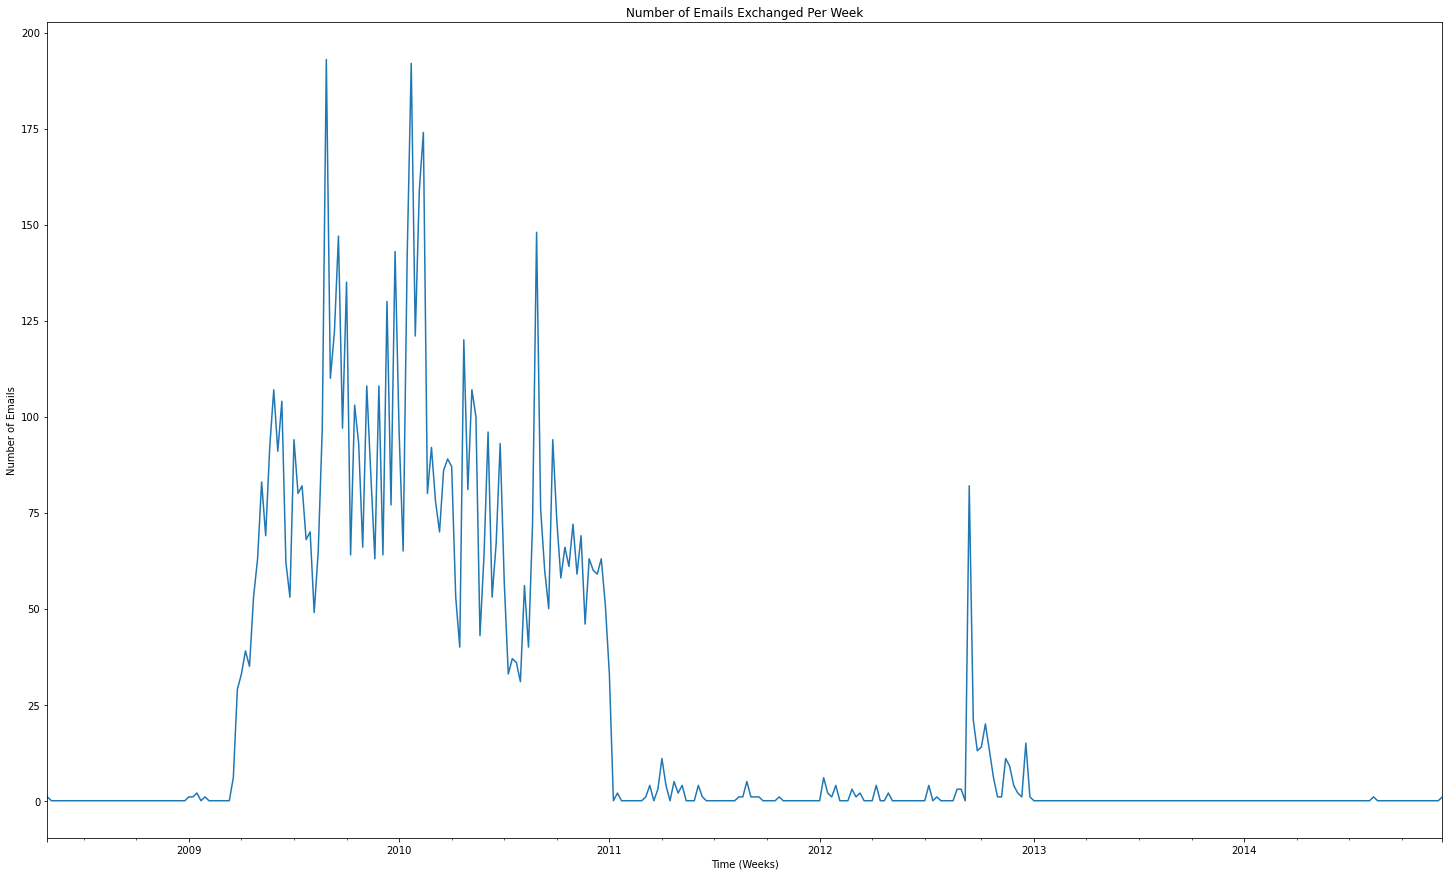

In [252]:
emails['MetadataDateSent'] = pd.to_datetime(emails['MetadataDateSent'])
email_dates = emails.set_index('MetadataDateSent')
email_dates['Id'].resample("W").count().plot.line(x=None, y='Id',  xlabel = 'Time (Weeks)', ylabel = 'Number of Emails',
                   title='Number of Emails Exchanged Per Week', figsize=(25,15))


Viewing emails exchanged per week helps illustrate the timeline of the emails over the course of Clinton's position as Secretary of State. The majority of emails were exchanged from 2009-2011 with a small spike in 2013. Because an essential aspect of the 'scandal' emphasized her private email use while serving as Secretary of State, I wonder if there were emails before 2009 or after 2013 that were not allowed to be released. 

### Q4: (2 points)
How many times is Donald Trump mentioned in the emails?

In [214]:
emails.ExtractedBodyText.str.contains(r'(?i)trump\b').sum()

emails.ExtractedBodyText.str.contains(r'(?i)donald trump\b').sum()

0

'trump' is found 4 times throughout all of the emails while 'donald trump' is found 0 times within the texts of the emails. This is reasonable considering Donald Trump announced his presidential candidacy in June of 2015 when all the emails were exchanged before then, and prior to that Trump was not involved in politics or anything concerning Secretary of State matters. 'trump' is also a verb that could explain the 4 occurrences in the emails texts. 

### Q5: (3 points)
How many email messages contain references to Libya or Syria in their Subject lines? (Note that this encompasses "Libya", "Libyan", "Syria", "Syrian", and other cases where Libya or Syria is part of a string.)

In [218]:
emails.ExtractedSubject.str.contains('(?i)syria').sum()
emails.ExtractedSubject.str.contains('(?i)libya').sum()
emails.ExtractedSubject.str.contains('(?i)syria|libya').sum()

70

'Libya' or 'Syria' is mentioned 82 within the subject lines of the emails. Syria was mentioned in 12 emails and Libya was mentioned in 70 emails. 1% of her emails mention either country. 

As Secretary of State, Clinton deals with foreign affairs. In 2011, Clinton was blamed for the fatalities during the attack in Benghazi, Libya. And there were complications with the leader of Syria at the time as well. Such emails could be a security breach but being blamed for the tradegy affected her personal life as well and could be signified in the emails.

### Q6: (4 points)
Report the proportions of original emails, replies (signified by subject lines that start with "Re:"), and forwarded messages (signified by subject lines that start with "Fw:").  Note that you should deal with upper- and lower-case variants of those prefixes (e.g. "RE:" is also a valid reply signifier).  The total proportions should add up to 100%.

In [219]:
total = len(emails)
replies = emails.ExtractedSubject.str.lower().str.startswith('re:').sum()
forwards = emails.ExtractedSubject.str.lower().str.startswith('fw:').sum()
original = total - replies - forwards

print('Replies:', (replies/total)*100, '%')
print('Forwards:', (forwards/total)*100, '%')
print('Original emails:', (original/total)*100, '%')

#ensuring it adds to 100%
#print((neither/total)*100 + (forwards/total)*100 + (replies/total)*100)

Replies: 32.63687853996224 %
Forwards: 19.320327249842666 %
Original emails: 48.04279421019509 %


48% of the emails are original emails, 33% are replies, and 19% are forwarded emails. Most commonly (about half the time), Clinton was sending emails directly to her recipients, while least commonly was she forwarding emails.

### Q7: (8 points)
How many email messages are about the election?  Note that you will first need to define your criteria for determining that an email message is "about" the election.  Be sure to include a markdown block explaining your reasoning.

In [235]:
emails.ExtractedBodyText.str.lower().str.contains(r'2016\b').sum()
emails.ExtractedBodyText.str.lower().str.contains(r'2016.election').sum()
emails.ExtractedBodyText.str.lower().str.contains(r'election').sum()
emails.ExtractedBodyText.str.lower().str.contains(r'voting|voter?s\b').sum()
emails.ExtractedBodyText.str.lower().str.contains(r'democrat').sum()
emails.ExtractedBodyText.str.lower().str.contains(r'republican').sum()
emails.ExtractedBodyText.str.lower().str.contains(r'candidate|candidacy').sum()


emails.ExtractedBodyText.str.lower().str.contains(r'voter?s|voting|election\b|2016\b|democrat|candidate|candidacy|republican').sum()


271

'2016' was mentioned one time in the emails, '2016 election' was never mentioned, 'election' was in 164 emails, 'voting', 'voters' or 'votes' are mentioned in 102 emails, 'democrat' is is 138 emails, 'republican' is mentioned in 109 emails, 'candidate' or 'candidacy' are in 73 emails. 

However most of these words are mentioned in the same emails. Any of the aforementioned phrases are in 271 emails. These different words encapsulate potential phrases used in the years leading up to an election without including overwhelming results of messages that are loosely or not related. 3% of the emails include election related jargon.

### Q8: (9 points)
Using only email messages sent by Hillary Clinton, determine the compound sentiment (as reported by the VADER sentiment intensity analyzer) for each one and create a boxplot for sentiment for each week.  In other words, your boxplot should have one "box" per week, with the x-axis being the week (date) and the y-axis showning the sentiment (with each box showing min, max, median, quartiles, and outliers).

In [253]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sent_from_hill['sentiments'] = sent_from_hill.ExtractedBodyText.dropna().apply(sid.polarity_scores)
for i in ['compound', 'neg', 'neu', 'pos']:
    sent_from_hill[i] = sent_from_hill['sentiments'].dropna().apply(lambda x: x[i])
sent_from_hill.drop('sentiments', axis=1).sample(10)


<ipython-input-253-f2f33ff130c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_from_hill['sentiments'] = sent_from_hill.ExtractedBodyText.dropna().apply(sid.polarity_scores)
<ipython-input-253-f2f33ff130c1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_from_hill[i] = sent_from_hill['sentiments'].dropna().apply(lambda x: x[i])


,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText,compound,neg,neu,pos
7053,7054,C05773880,SCHEDULE,ValmoroLJ@state.gov,H,80.0,2010-02-11 05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0120/DOC_0C0...,F-2014-20439,...,F-2014-20439,C05773880,08/31/2015,RELEASE IN PART,The Lithuanian FM just told me the Community o...,UNCLASSIFIED U.S. Department of State Case No....,0.8645,0.011,0.893,0.096
7802,7803,C05777061,ASSESSING OUR PROGRESS TO DATE AND PROPOSING P...,JilotyLC@state.gov,H,80.0,2010-06-23 04:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0128/DOC_0C0...,F-2014-20439,...,F-2014-20439,C05777061,08/31/2015,RELEASE IN FULL,leverage\nPls print.,UNCLASSIFIED U.S. Department of State Case No....,0.0772,0.000,0.606,0.394
7474,7475,C05775152,ESPINOSA,ValmoroLJ@state.gov,H,80.0,2010-03-21 04:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0122/DOC_0C0...,F-2014-20439,...,F-2014-20439,C05775152,08/31/2015,RELEASE IN FULL,Am I supposed to call her tomorrow?,UNCLASSIFIED U.S. Department of State Case No....,0.0000,0.000,1.000,0.000
7362,7363,C05774903,"H: IF THIS POLL HOLDS, LABOUR HAS A MAJORITY. ...",sbwhoeop,H,80.0,2010-04-13 04:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0124/DOC_0C0...,F-2014-20439,...,F-2014-20439,C05774903,08/31/2015,RELEASE IN PART,"H <hrod17@clintonemail.com >\nTuesday, April 1...",UNCLASSIFIED U.S. Department of State Case No....,-0.4186,0.080,0.920,0.000
6701,6702,C05772889,VENEZUELA,valenzuelaaa@state.gov,H,80.0,2010-01-18 05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0116/DOC_0C0...,F-2014-20439,...,F-2014-20439,C05772889,08/31/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nMonday, January 1...",UNCLASSIFIED U.S. Department of State Case No....,0.0000,0.000,1.000,0.000
6734,6735,C05772998,QUESTION,sterntd@state.gov,H,80.0,2010-01-03 05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0116/DOC_0C0...,F-2014-20439,...,F-2014-20439,C05772998,08/31/2015,RELEASE IN FULL,"First, Happy New Year to Jen and Stern clan. H...",UNCLASSIFIED U.S. Department of State Case No....,0.9924,0.000,0.694,0.306
7280,7281,C05774622,AU/IRAN,sullivanjj@state.gov,H,80.0,2010-05-02 04:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0125/DOC_0C0...,F-2014-20439,...,F-2014-20439,C05774622,08/31/2015,RELEASE IN PART,"RELEASE IN PART\n1.4(B),B1,1.4(D)\n1.4(D)\nB1\...",UNCLASSIFIED U.S. Department of State Case No....,0.0000,0.000,1.000,0.000
852,853,C05759835,SORRY TO MISS YOU,cherieblair,H,80.0,2009-09-29 04:00:00+00:00,2015-06-30T04:00:00+00:00,DOCUMENTS/HRCAll_1_1-29_JuneWEB/10_11_15_16/DO...,F-2014-20439,...,F-2014-20439,C05759835,06/30/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nTuesday, Septembe...",UNCLASSIFIED U.S. Department of State Case No....,0.9134,0.047,0.799,0.154
6541,6542,C05772445,ANN,millscd@state.gov,H,80.0,2010-01-07 05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0115/DOC_0C0...,F-2014-20439,...,F-2014-20439,C05772445,08/31/2015,RELEASE IN FULL,Agreed--Maura is so smart!,UNCLASSIFIED U.S. Department of State Case No....,0.5836,0.000,0.442,0.558
620,621,C05759072,COLUMBIA,shapiroa@state.gov,H,80.0,2009-07-31 04:00:00+00:00,2015-06-30T04:00:00+00:00,DOCUMENTS/HRCAll_1_1-29_JuneWEB/1_5_9/DOC_0C05...,F-2014-20439,...,F-2014-20439,C05759072,06/30/2015,RELEASE IN FULL,Will the DCA team be in Columbia in early Augu...,UNCLASSIFIED U.S. Department of State Case No....,0.0000,0.000,1.000,0.000


<ipython-input-263-b9dae46316fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_from_hill['MetadataDateSent'] = pd.to_datetime(sent_from_hill['MetadataDateSent'])
/Users/andreaholber/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

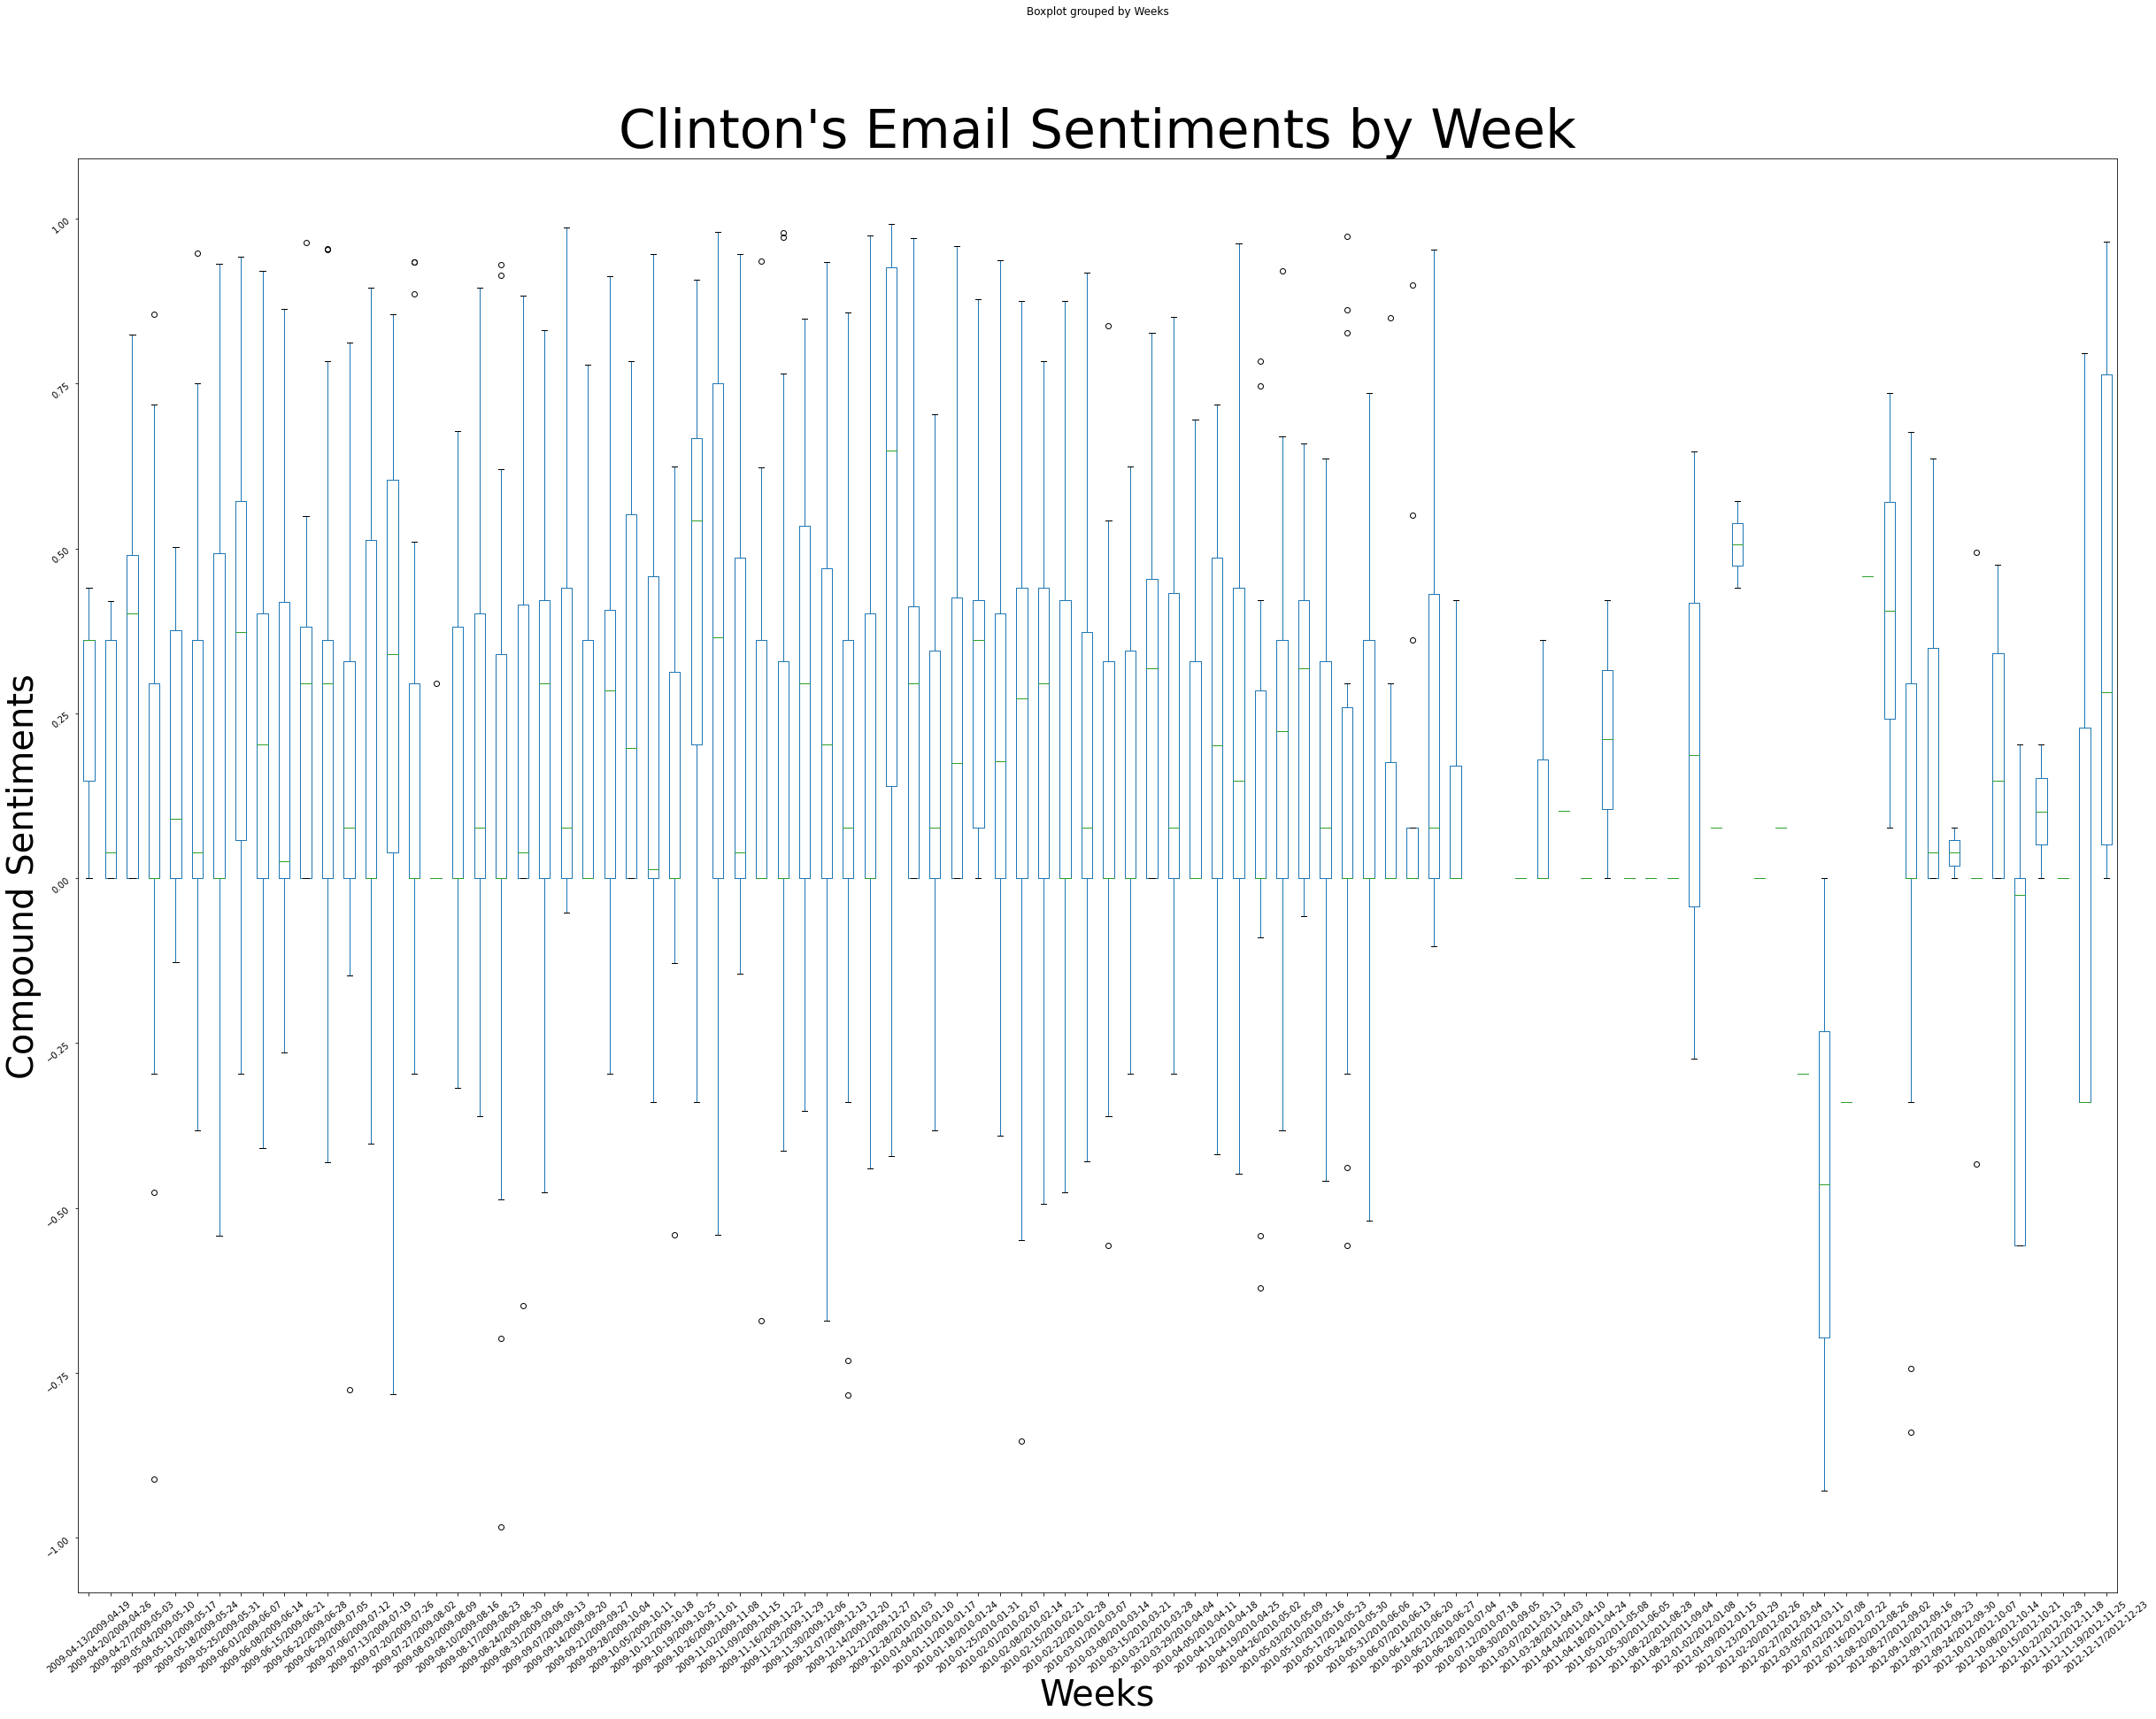

In [263]:
sent_from_hill['MetadataDateSent'] = pd.to_datetime(sent_from_hill['MetadataDateSent'])
sent_from_hill_index = sent_from_hill.set_index('MetadataDateSent')
#sent_from_hill.set_index('MetadataDateSent', inplace = True)

sent_from_hill_index['Weeks'] = sent_from_hill_index.index.to_period('1W')
# sent_from_hill_index
sentiments = sent_from_hill_index.drop(['Id', 'SenderPersonId'], axis=1)


fig = plt.figure()
sentiments.boxplot(by='Weeks', column='compound', figsize=(40,30), grid=False)
plt.xlabel('Weeks', fontsize = 40)
plt.ylabel('Compound Sentiments', fontsize = 40)
plt.title('Clinton\'s Email Sentiments by Week', fontsize = 60)
plt.tick_params(rotation=40)
plt.show()


Insert your interpretation here.

### Q9: (8 points)
Using Named Entity Recognition, extract PERSONs from the ExtractedBodyText field from Emails.csv for messages sent by Hillary Clinton. Report the top 10 most common PERSONs mentioned in the emails.

In [162]:
def find_person(sentence):
    tokens = nltk.word_tokenize(str(sentence))
    tagged = nltk.pos_tag(tokens)
    entities = nltk.chunk.ne_chunk(tagged)
    for entity in entities.subtrees():
        if entity.label() == "PERSON":
            name = []
            for leaf in entity.leaves():
                name.append(leaf[0])
            return (" ".join(name))
        
sent_from_hill['Persons'] = sent_from_hill['ExtractedBodyText'].apply(find_person) 
#emails['Persons'] = emails[emails['Persons'] != None]

sent_from_hill['Persons'].value_counts().sort_values(ascending = False).head(10)

Bill         23
IN           17
Pls          10
Jack          9
Cheryl        8
Holbrooke     8
Jim           8
Hillary       8
Mike          7
Huma          7
Name: Persons, dtype: int64

The top 10 names in order are Bill, IN, Pls, Jack, Cheryl, Holbrooke, Jim, Hillary, Mike, and Huma. Of course, 'IN' and 'Pls' are not names of real people, however, the other 8 are demonstrating the program is roughly 80% accurate. Tying back to question 2 of Hillary's top recipients, Huma and Cheryl were among the most frequent recipients and 'Jack' was an alias for Jake sullivan, the third most frequent. Everyone else, including Hillary's husband Bill, are all likely and reasonable recipients to her emails. There are no suspicious emailers involved in the top 10 that would flag a reason for the emails to be labeled as harmful.

____